In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
# inspector = inspect(engine)
# columns = inspector.get_columns('measurement')
# for x in columns:
#     print(x['name'],x['type'])

most_recent =session.query(func.max(Measurement.date)).first()

start = session.query(Measurement.date).\
filter(Measurement.date >= "2011-09-11").all()
start

[('2011-09-11',),
 ('2011-09-12',),
 ('2011-09-13',),
 ('2011-09-14',),
 ('2011-09-15',),
 ('2011-09-16',),
 ('2011-09-17',),
 ('2011-09-18',),
 ('2011-09-19',),
 ('2011-09-20',),
 ('2011-09-21',),
 ('2011-09-22',),
 ('2011-09-23',),
 ('2011-09-24',),
 ('2011-09-25',),
 ('2011-09-26',),
 ('2011-09-27',),
 ('2011-09-28',),
 ('2011-10-01',),
 ('2011-10-02',),
 ('2011-10-03',),
 ('2011-10-05',),
 ('2011-10-06',),
 ('2011-10-07',),
 ('2011-10-08',),
 ('2011-10-09',),
 ('2011-10-10',),
 ('2011-10-11',),
 ('2011-10-12',),
 ('2011-10-13',),
 ('2011-10-14',),
 ('2011-10-15',),
 ('2011-10-16',),
 ('2011-10-17',),
 ('2011-10-18',),
 ('2011-10-19',),
 ('2011-10-20',),
 ('2011-10-21',),
 ('2011-10-22',),
 ('2011-10-23',),
 ('2011-10-24',),
 ('2011-10-25',),
 ('2011-10-26',),
 ('2011-10-27',),
 ('2011-10-28',),
 ('2011-10-29',),
 ('2011-10-30',),
 ('2011-10-31',),
 ('2011-11-01',),
 ('2011-11-02',),
 ('2011-11-03',),
 ('2011-11-04',),
 ('2011-11-05',),
 ('2011-11-06',),
 ('2011-11-07',),
 ('2011-11

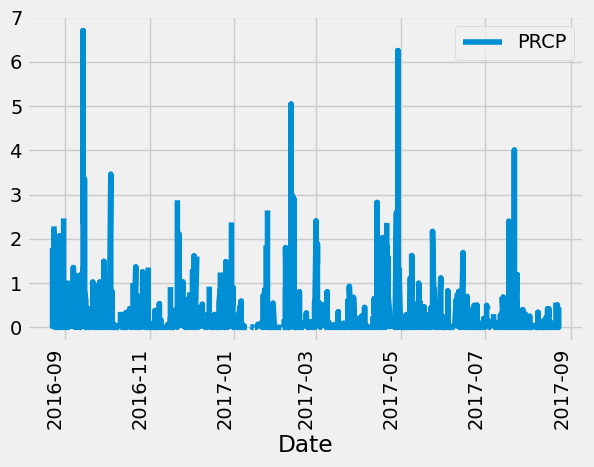

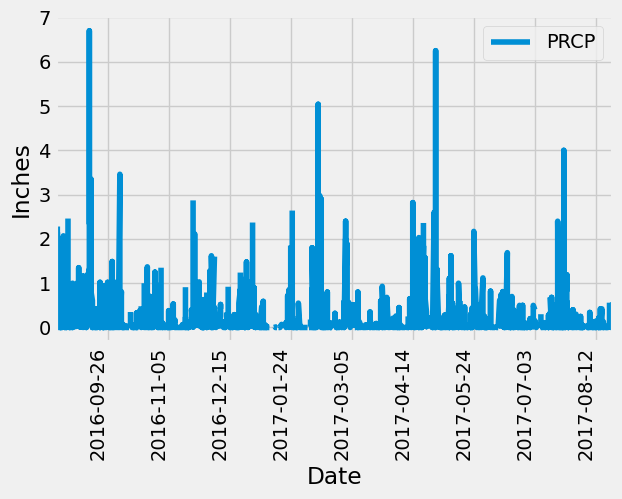

In [10]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. (prcp)

# Calculate the date one year from the last date in data set.
for x in most_recent:
    convert_mr = dt.datetime.strptime(x,'%Y-%m-%d')
convert_mr #timestamp
convert_my = convert_mr.strftime('%Y-%m-%d')#date
     

previous12 = convert_mr - dt.timedelta(days=365) # timestamp
previous13 = previous12.strftime('%Y-%m-%d') #date


# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.id,Measurement.date,func.sum(Measurement.prcp)]

# data_prcp = session.query(*sel).filter((Measurement.date <= convert_my) & (Measurement.date >=previous13)).\
# group_by(Measurement.date).order_by(Measurement.date.desc()).all()
data_prcp = session.query(Measurement.id,Measurement.date,Measurement.prcp).\
filter((Measurement.date <= convert_my) & (Measurement.date >=previous13)).all()

data_prcp #date

# Save the query results as a Pandas DataFrame and set the index to the date column
climate = pd.DataFrame(data_prcp,columns=["Id","Date","PRCP"]) #date

climate['Date'] = pd.to_datetime(climate['Date'], format='%Y-%m-%d') #timestamp
climate.set_index('Id',inplace=True)
climate


# Sort the dataframe by date
climate.sort_values(by=['Date'],inplace=True)
climate


# # # # Use Pandas Plotting with Matplotlib to plot the data

# y = previous12
# az = []
# for temp in climate["Date"]:
#     p = temp
#     if(p == y):
        
#         y = temp + dt.timedelta(days=39)
#         temp = temp.strftime('%Y-%m-%d')
#         az.append(temp)
#     if(temp == climate["Date"].min()):
#         temp = temp.strftime('%Y-%m-%d')
#         az.append(temp)
        
x_axis = climate["Date"]
y_axis = climate["PRCP"]

        
climate.plot('Date','PRCP',rot=90)

import matplotlib.dates as mdates
import matplotlib.pylab as plt

ax = climate.plot('Date','PRCP',rot=90)
plt.ylabel('Inches')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlim([dt.datetime(2016,8,23),dt.datetime(2017,8,23)])
plt.show()


    



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for x in columns:
    print(x['name'],x['type'])
    
session.query(Measurement.station).count()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


19550

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,Measurement.id).group_by(Measurement.station).\
order_by(Measurement.id.desc()).all()






[('USC00516128', 16939),
 ('USC00511918', 14960),
 ('USC00519281', 12188),
 ('USC00519523', 9519),
 ('USC00518838', 9008),
 ('USC00517948', 7636),
 ('USC00514830', 5434),
 ('USC00513117', 2725),
 ('USC00519397', 1)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mel = [func.min(Measurement.prcp),func.max(Measurement.prcp),func.avg(Measurement.prcp)]
session.query(*mel).group_by(Measurement.station).order_by(Measurement.id.desc()).first()

(0.0, 8.06, 0.4299879227053122)

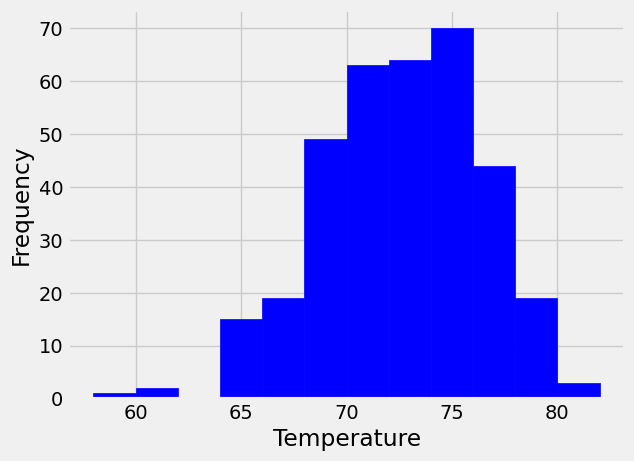

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent = session.query(func.max(Measurement.date)).group_by(Measurement.station).\
order_by(Measurement.id.desc()).first()

for r in recent:
    convert_1 = dt.datetime.strptime(r,'%Y-%m-%d')
convert_1 #timestamp
convert_2 = convert_1.strftime('%Y-%m-%d')#date
     

previous1 = convert_1 - dt.timedelta(days=365) # timestamp
previous2 = previous1.strftime('%Y-%m-%d') #date

high = session.query(Measurement.station).group_by(Measurement.station).\
order_by(Measurement.id.desc()).first()

high

for r in high:
    i = r
i
data_station = session.query(Measurement.tobs).\
filter((Measurement.station ==i)& (Measurement.date <= convert_2) & (Measurement.date >=previous2)).all()
data_station

histo = pd.DataFrame(data_station,columns=["Tobs"])


plt.hist(histo,bins=12,edgecolor = 'blue',color='blue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [36]:
start1 = session.query(Measurement.date).\
filter(Measurement.date >= "2011-09-11").all()
start1
startdict=[]
for number in start1:
    dates={}
    dates['Start'] = number
    startdict.append(dates)
startdict

[{'Start': ('2011-09-11',)},
 {'Start': ('2011-09-12',)},
 {'Start': ('2011-09-13',)},
 {'Start': ('2011-09-14',)},
 {'Start': ('2011-09-15',)},
 {'Start': ('2011-09-16',)},
 {'Start': ('2011-09-17',)},
 {'Start': ('2011-09-18',)},
 {'Start': ('2011-09-19',)},
 {'Start': ('2011-09-20',)},
 {'Start': ('2011-09-21',)},
 {'Start': ('2011-09-22',)},
 {'Start': ('2011-09-23',)},
 {'Start': ('2011-09-24',)},
 {'Start': ('2011-09-25',)},
 {'Start': ('2011-09-26',)},
 {'Start': ('2011-09-27',)},
 {'Start': ('2011-09-28',)},
 {'Start': ('2011-10-01',)},
 {'Start': ('2011-10-02',)},
 {'Start': ('2011-10-03',)},
 {'Start': ('2011-10-05',)},
 {'Start': ('2011-10-06',)},
 {'Start': ('2011-10-07',)},
 {'Start': ('2011-10-08',)},
 {'Start': ('2011-10-09',)},
 {'Start': ('2011-10-10',)},
 {'Start': ('2011-10-11',)},
 {'Start': ('2011-10-12',)},
 {'Start': ('2011-10-13',)},
 {'Start': ('2011-10-14',)},
 {'Start': ('2011-10-15',)},
 {'Start': ('2011-10-16',)},
 {'Start': ('2011-10-17',)},
 {'Start': ('2

# Close session

In [17]:
# Close Session
session.close()